In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Visualizing the data

Text(0.5, 0, 'FICO')

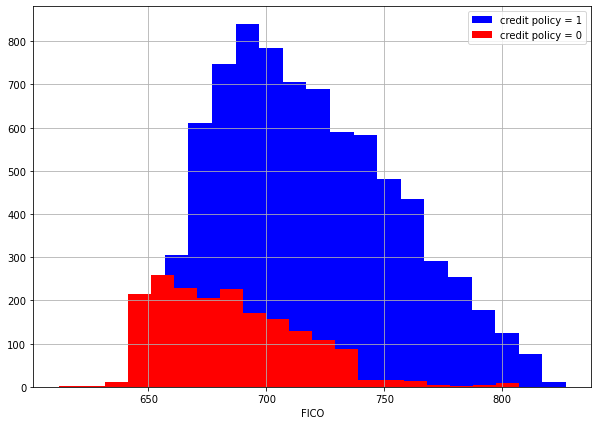

In [4]:
plt.figure(figsize=(10,7))
loans[loans['credit.policy']==1]['fico'].hist(bins=20,color = 'blue',label = 'credit policy = 1')
loans[loans['credit.policy']==0]['fico'].hist(bins=20,color = 'red',label = 'credit policy = 0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

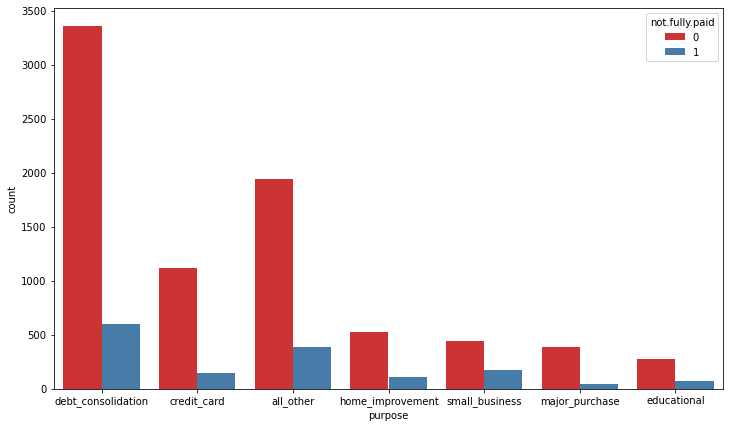

In [5]:
plt.figure(figsize=(12,7))
sns.countplot(x='purpose',hue = 'not.fully.paid',data = loans,palette = 'Set1')

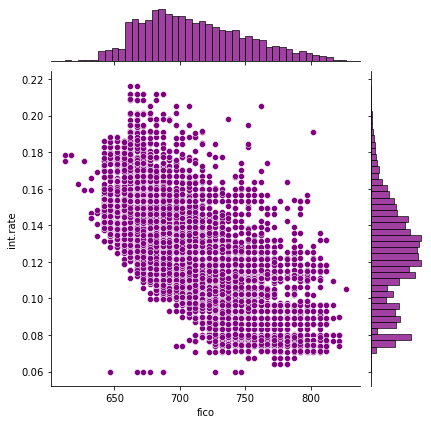

In [6]:
sns.jointplot(x='fico',y='int.rate',data=loans,color = 'purple')

<Figure size 720x504 with 0 Axes>

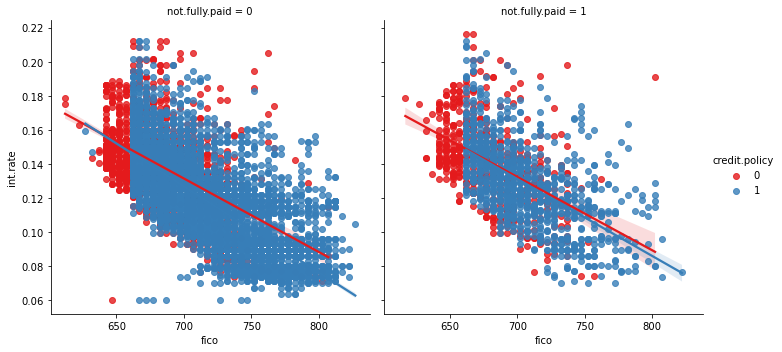

In [9]:
plt.figure(figsize=(10,7))
sns.lmplot(y='int.rate',x = 'fico',data = loans,hue = 'credit.policy',col = 'not.fully.paid',
          palette='Set1')

### Making the right data for training
#### Notice that the Purpose column is a categorical variable now we will have to change it as per the one hot encoding using the dummy function 

In [11]:
cat_feature = ['purpose']
final_data = pd.get_dummies(loans,columns=cat_feature,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

### See from 13 to 18 we have created new columns

### Deploying the models

#### The first process is a Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split
x= final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

### Training a Decision Tree model

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
predictions = dtc.predict(x_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


[[1991  397]
 [ 372  114]]


              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2388
           1       0.22      0.23      0.23       486

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.73      0.74      2874



### Training a random forest classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)

rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

In [40]:
pred_rfc = rfc.predict(x_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(confusion_matrix(y_test,pred_rfc))
print('\n')
print(classification_report(y_test,pred_rfc))

[[2379    9]
 [ 478    8]]


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2388
           1       0.47      0.02      0.03       486

    accuracy                           0.83      2874
   macro avg       0.65      0.51      0.47      2874
weighted avg       0.77      0.83      0.76      2874

